In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('I:/Marco/analysis_nima/Python Scripts') #changing directory to ETL.py folder

from ETL import ETL
from ETL import Plot
from ETL import activation
from ETL import run_per_mouse
from ETL import raster_plot
from ETL import run_per_mouse_concatinated
import pandas as pd
import seaborn as sns

# The notebook contains 2 separate section
### 1. In this section all units per mouse have been concatinated first then mean frquency and amplitude are calculated.
### 2. In this section mean frequency and amplitude are calculated per unit in each mouse then mean/median of all units will be calculated as a result per mouse.

## Section 1
#### running on concatinated units

### step-by-step running the code

In [12]:
# initializing ETL
ETL_ = ETL(sf=30.955, ending='.mat', unit_length=600)

# giving file or files path
ETL_.get_path('I:/Marco/analysis_nima/250520_m18a')

# loading all files to ETL memory
ETL_.load_files()

# getting hypno signals for all files
Hypno_ = ETL_.get_hypno()

# getting full data set
full_dataset = ETL_.get_data_values()

print(f'Hypno shape {Hypno_.shape} and Data shape {full_dataset.shape}')


# setting artifact period
ETL_.set_artifact(start_= 0, end_= 1000, file_= 0) # start and end should be based on sampling index


# getting artifacts
data_artifacts, hypno_artifacts = ETL_.get_artifacts()
print(f'data artifact shape {data_artifacts.shape}, hypno_artifact shape {hypno_artifacts.shape}')

Your entered path is I:/Marco/analysis_nima/250520_m18a
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat']  Number of all files 29
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 237 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18573, 29) and Data shape (18573, 237, 29)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18573, 237, 29)
output = data_artifacts, hypno_artifacts
data artifact shape (18573, 237, 29), hypno_artifact shape (18573, 29)


In [13]:
# initializing activation class

artifacts_use = True

if artifacts_use:
    activation_ = activation(hypno=np.hstack(Hypno_)[:,np.newaxis], data=np.hstack(full_dataset.T).T[:,:,np.newaxis], 
                             hypno_artifacts=np.hstack(hypno_artifacts)[:,np.newaxis], 
                             data_artifacts=np.hstack(data_artifacts.T).T[:,:,np.newaxis])
else:
    activation_ = activation(hypno=np.hstack(Hypno_)[:,np.newaxis], data=np.hstack(full_dataset.T).T[:,:,np.newaxis], 
                         hypno_artifacts=np.empty(1), data_artifacts=np.empty(1))



# executing mean firing rate calculation
activation_.mean_fire(file_nr=0, sr=30.955, amplitude_NaN_Zero=False)


# getting mean firing rate result for all cells in given file
sws_fr, rem_fr, awake_fr = activation_.get_mean_firing_rates()

# getting mean amplitude for all cells in given file
sws_amp, rem_amp, awake_amp = activation_.get_mean_amplitudes()


# getting data in sws, rem, awake (data is cleaned for artifacts if the artifact signal is given)
sws, rem, awake = activation_.get_group_data()


I:\Marco\analysis_nima\Python Scripts\ETL.py:159: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_sws = np.sum(np.where(data_sws > 0, data_sws, 0), axis = 0) / np.sum(np.where(data_sws > 0, 1, 0), axis = 0)
I:\Marco\analysis_nima\Python Scripts\ETL.py:160: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_rem = np.sum(np.where(data_rem > 0, data_rem, 0), axis = 0) / np.sum(np.where(data_rem > 0, 1, 0), axis = 0)


output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
SWS size (538617, 237), REM size (538617, 237), awake size (538617, 237)


I:\Marco\analysis_nima\Python Scripts\ETL.py:161: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_awake = np.sum(np.where(data_awake > 0, data_awake, 0), axis = 0) / np.sum(np.where(data_awake > 0, 1, 0), axis = 0)


### running per mouse 

In [2]:
sws_fr_m1, rem_fr_m1, awake_fr_m1, sws_amp_m1, rem_amp_m1, awake_amp_m1 =  run_per_mouse_concatinated(sf_=30.955, 
                                                                                        ending_='.mat', 
                                                                                        unit_lenght_=600, 
                                                                                        address_= 'I:/Marco/analysis_nima/250520_m18a',
                                                                                        set_artifacts_=[[0,1000,0]], 
                                                                                        amplitude_NaN_Zero=False)

Your entered path is I:/Marco/analysis_nima/250520_m18a
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat']  Number of all files 29
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 237 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18573, 29) and Data shape (18573, 237, 29)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18573, 237, 29)
setting artifacts for file 0
output = data_artifacts, hypno_artifacts
data artifact shape (18573, 237, 29), hypn

I:\Marco\analysis_nima\Python Scripts\ETL.py:159: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_sws = np.sum(np.where(data_sws > 0, data_sws, 0), axis = 0) / np.sum(np.where(data_sws > 0, 1, 0), axis = 0)
I:\Marco\analysis_nima\Python Scripts\ETL.py:160: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_rem = np.sum(np.where(data_rem > 0, data_rem, 0), axis = 0) / np.sum(np.where(data_rem > 0, 1, 0), axis = 0)
I:\Marco\analysis_nima\Python Scripts\ETL.py:161: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_awake = np.sum(np.where(data_awake > 0, data_awake, 0), axis = 0) / np.sum(np.where(data_awake > 0, 1, 0), axis = 0)


output = sws, rem , awake
output = sws, rem , awake


In [3]:
sws_fr_m2, rem_fr_m2, awake_fr_m2, sws_amp_m2, rem_amp_m2, awake_amp_m2 =  run_per_mouse_concatinated(sf_=30.955, 
                                                                                        ending_='.mat', 
                                                                                        unit_lenght_=600, 
                                                                                        address_= 'I:/Marco/analysis_nima/290520_m17a',
                                                                                        set_artifacts_=[[0,1000,0]], 
                                                                                        amplitude_NaN_Zero=False)

Your entered path is I:/Marco/analysis_nima/290520_m17a
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat']  Number of all files 28
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 231 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18573, 28) and Data shape (18573, 231, 28)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18573, 231, 28)
setting artifacts for file 0
output = data_artifacts, hypno_artifacts
data artifact shape (18573, 231, 28), hypno_artifact sha

In [5]:
sws_fr_m3, rem_fr_m3, awake_fr_m3, sws_amp_m3, rem_amp_m3, awake_amp_m3 =  run_per_mouse_concatinated(sf_=30.955, 
                                                                                        ending_='.mat', 
                                                                                        unit_lenght_=600, 
                                                                                        address_= 'I:/Marco/analysis_nima/110620_m18b',
                                                                                        set_artifacts_=[[0,1000,0]], 
                                                                                        amplitude_NaN_Zero=False)

Your entered path is I:/Marco/analysis_nima/110620_m18b
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat']  Number of all files 22
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 218 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18573, 22) and Data shape (18573, 218, 22)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18573, 218, 22)
setting artifacts for file 0
output = data_artifacts, hypno_artifacts
data artifact shape (18573, 218, 22), hypno_artifact shape (18573, 22)
output = sws, rem , awake
output = sws, rem , awake


### Concatinating results

In [6]:
sws_fr_avg = np.hstack([sws_fr_m1,sws_fr_m2, sws_fr_m3])
rem_fr_avg = np.hstack([rem_fr_m1,rem_fr_m2, rem_fr_m3])
awake_fr_avg = np.hstack([awake_fr_m1,awake_fr_m2, awake_fr_m3])

sws_amp_avg = np.hstack([sws_amp_m1,sws_amp_m2, sws_amp_m3])
rem_amp_avg = np.hstack([rem_amp_m1,rem_amp_m2, rem_amp_m3])
awake_amp_avg = np.hstack([awake_amp_m1,awake_amp_m2, awake_amp_m3])

## Plotting results

length of data in mouse1 237, mouse2 231, mouse3 218


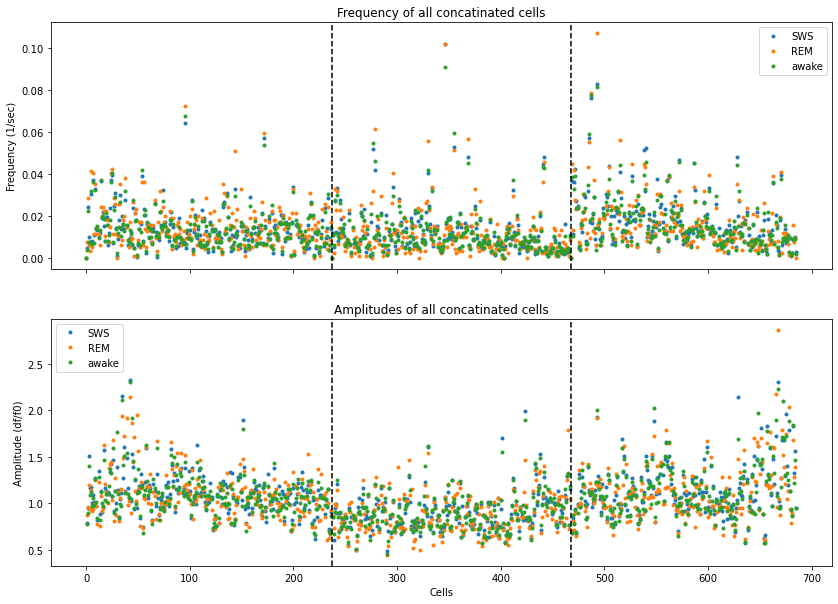

In [7]:
# plotting traces
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,10), sharex=True)
print(f'length of data in mouse1 {len(sws_fr_m1)}, mouse2 {len(sws_fr_m2)}, mouse3 {len(sws_fr_m3)}')

ax[0].plot(sws_fr_avg,'.', label = 'SWS')
ax[0].plot(rem_fr_avg,'.', label = 'REM')
ax[0].plot(awake_fr_avg,'.', label = 'awake')
ax[0].set_title('Frequency of all concatinated cells')
ax[0].set_ylabel('Frequency (1/sec)')
ax[0].legend()

ax[0].axvline(x=len(sws_fr_m1) , ls = '--', color = 'k')
ax[0].axvline(x=len(sws_fr_m2) + len(sws_fr_m1) , ls = '--', color = 'k')
#ax[0].axvline(x=len(sws_fr_m3) + len(sws_fr_m2) + len(sws_fr_m1))



ax[1].plot(sws_amp_avg,'.', label = 'SWS')
ax[1].plot(rem_amp_avg,'.', label = 'REM')
ax[1].plot(awake_amp_avg,'.', label = 'awake')
ax[1].set_title('Amplitudes of all concatinated cells')
ax[1].set_ylabel('Amplitude (df/f0)')
ax[1].set_xlabel('Cells')
ax[1].legend()

ax[1].axvline(x=len(sws_amp_m1), ls = '--', color = 'k')
ax[1].axvline(x=len(sws_amp_m2) + len(sws_amp_m1) , ls = '--', color = 'k')
#ax[1].axvline(x=len(sws_amp_m3) + len(sws_amp_m2) + len(sws_amp_m1))

c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

<Figure size 720x720 with 0 Axes>

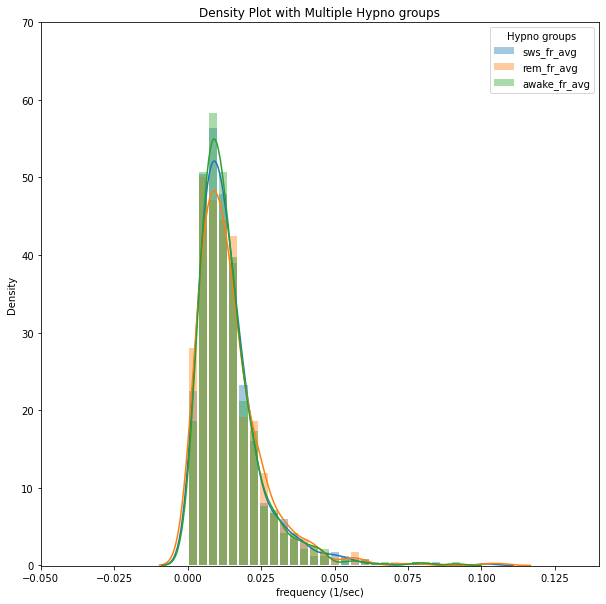

In [13]:
plot_ = Plot(x=sws_fr_avg,y=rem_fr_avg, z = awake_fr_avg, 
             xlabel='sws_fr_avg', ylabel='rem_fr_avg', zlabel = 'awake_fr_avg',
            save_address=False)
plot_.marginal_dist(awake_=True, bins_=np.linspace(0,.1,30), 
                    range_=[[-.05, .14], [-.05, 70]], density_=True, 
                    kde_=True, name_='frequency (1/sec)')

c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

<Figure size 720x720 with 0 Axes>

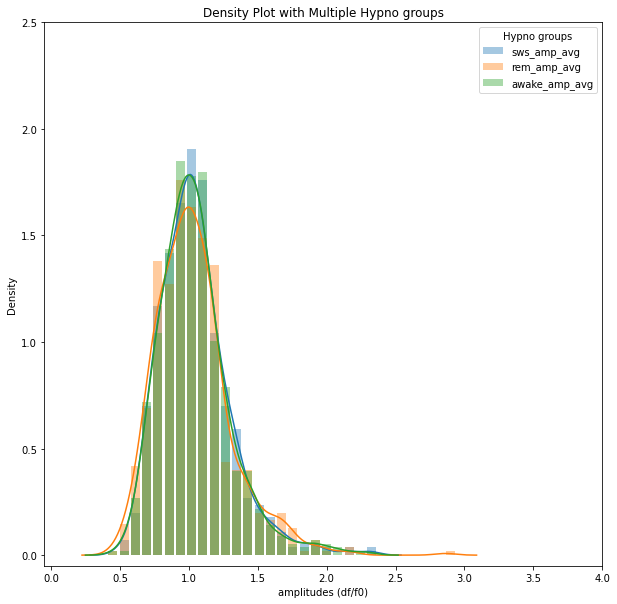

In [11]:
plot_ = Plot(x=sws_amp_avg,y=rem_amp_avg, z = awake_amp_avg, 
             xlabel='sws_amp_avg', ylabel='rem_amp_avg', zlabel = 'awake_amp_avg',
            save_address=False)
plot_.marginal_dist(awake_=True, bins_=np.linspace(0,4,50), 
                    range_=[[-.05, 4], [-.05, 2.5]], density_=True, 
                    kde_=True, name_='amplitudes (df/f0)')

'kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }'

<Figure size 720x720 with 0 Axes>

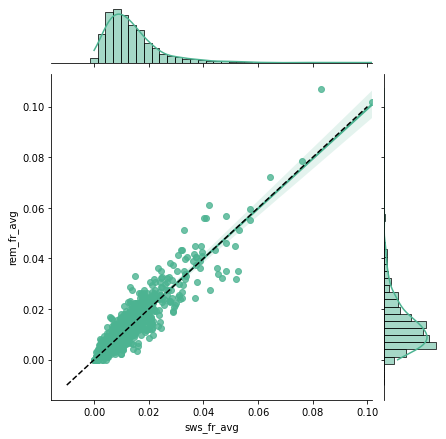

In [14]:
plot_ = Plot(x=sws_fr_avg,y=rem_fr_avg, z = awake_fr_avg, 
             xlabel='sws_fr_avg', ylabel='rem_fr_avg', zlabel = 'awake_fr_avg',
            save_address=False)
plot_.join_plot(bins_= np.linspace(-.01, .1, 40), kind_='reg')

'kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }'

<Figure size 720x720 with 0 Axes>

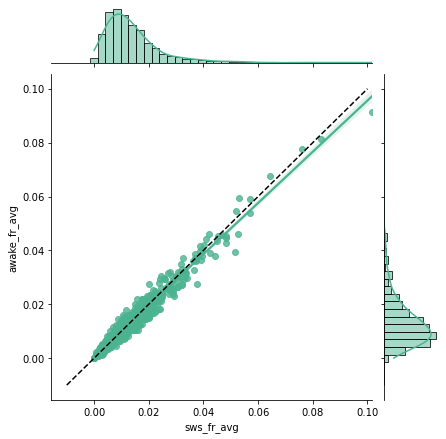

In [19]:
plot_ = Plot(x=sws_fr_avg,y=awake_fr_avg, z = awake_fr_avg, 
             xlabel='sws_fr_avg', ylabel='awake_fr_avg', zlabel = 'awake_fr_avg',
            save_address=False)
plot_.join_plot(bins_= np.linspace(-.01, .1, 40), kind_='reg')


<Figure size 720x720 with 0 Axes>

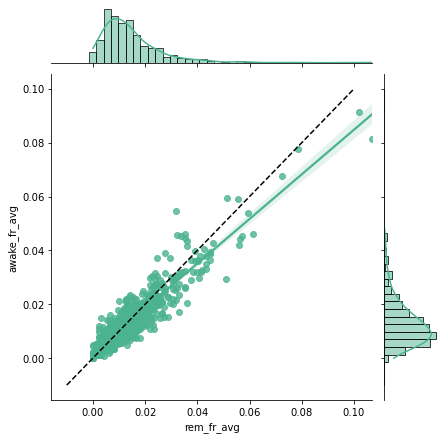

In [21]:
plot_ = Plot(x=rem_fr_avg,y=awake_fr_avg, z = awake_fr_avg, 
             xlabel='rem_fr_avg', ylabel='awake_fr_avg', zlabel = 'awake_fr_avg',
            save_address=False)
plot_.join_plot(bins_= np.linspace(-.01, .1, 40), kind_='reg')

<Figure size 720x720 with 0 Axes>

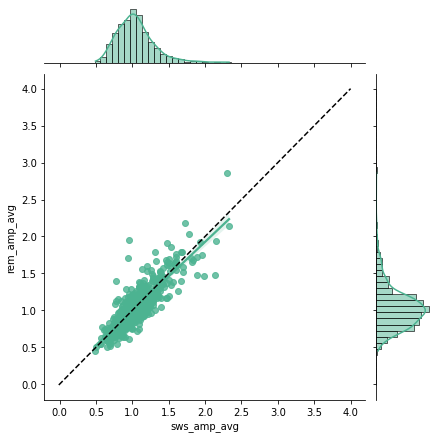

In [15]:
plot_ = Plot(x=sws_amp_avg,y=rem_amp_avg, z = awake_amp_avg, 
             xlabel='sws_amp_avg', ylabel='rem_amp_avg', zlabel = 'awake_amp_avg',
            save_address=False)
plot_.join_plot(bins_= np.linspace(-.01, 4, 50), kind_ = 'reg')

<Figure size 720x720 with 0 Axes>

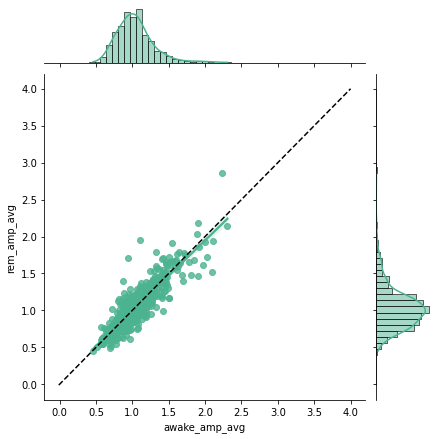

In [20]:
plot_ = Plot(x=awake_amp_avg,y=rem_amp_avg, z = awake_amp_avg, 
             xlabel='awake_amp_avg', ylabel='rem_amp_avg', zlabel = 'awake_amp_avg',
            save_address=False)
plot_.join_plot(bins_= np.linspace(-.01, 4, 50), kind_ = 'reg')

<Figure size 720x720 with 0 Axes>

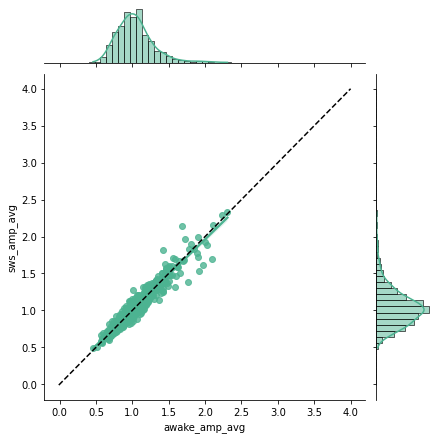

In [22]:
plot_ = Plot(x=awake_amp_avg,y=sws_amp_avg, z = awake_amp_avg, 
             xlabel='awake_amp_avg', ylabel='sws_amp_avg', zlabel = 'awake_amp_avg',
            save_address=False)
plot_.join_plot(bins_= np.linspace(-.01, 4, 50), kind_ = 'reg')

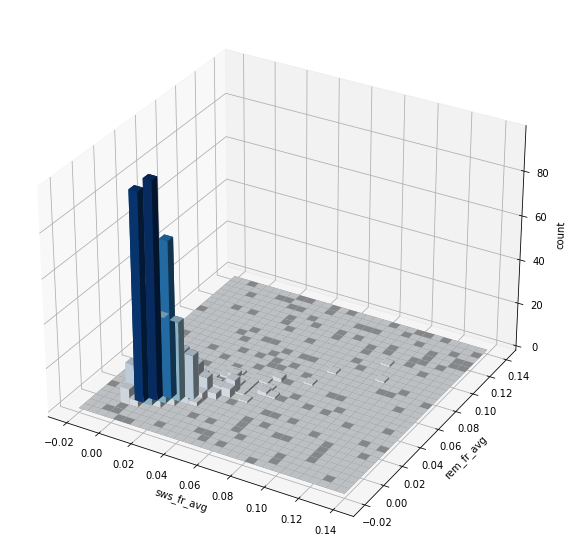

In [16]:
plot_ = Plot(x=sws_fr_avg, y=rem_fr_avg, 
             z= awake_fr_avg, xlabel='sws_fr_avg', ylabel='rem_fr_avg', zlabel = 'awake_fr_avg',
            save_address=False)
plot_.hist_3d(bins_=30, range_=[[-.02, .14], [-.02, .14]], density_=False)


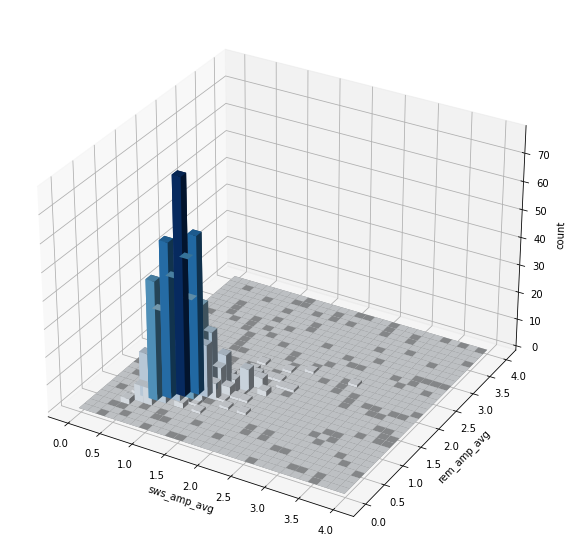

In [17]:
plot_ = Plot(x=sws_amp_avg,y=rem_amp_avg, z = awake_amp_avg, 
             xlabel='sws_amp_avg', ylabel='rem_amp_avg', zlabel = 'awake_amp_avg',
            save_address=False)
plot_.hist_3d(bins_=30, range_=[[-.02, 4], [-.02, 4]], density_=False)

## Section 2
#### running per unit

### step-by-step running the code

In [2]:
# initializing ETL
ETL_ = ETL(sf=30.955, ending='.mat', unit_length=600)

# giving file or files path
ETL_.get_path('I:/Marco/analysis_nima/250520_m18a')
#ETL_.get_path('I:/Marco/analysis_nima/290520_m17a')
# loading all files to ETL memory
ETL_.load_files()

# getting hypno signals for all files
Hypno_ = ETL_.get_hypno()

# getting full data set
full_dataset = ETL_.get_data_values()

print(f'Hypno shape {Hypno_.shape} and Data shape {full_dataset.shape}')


# setting artifact period
ETL_.set_artifact(start_= 0, end_= 1000, file_= 0) # start and end should be based on sampling index


# getting artifacts
data_artifacts, hypno_artifacts = ETL_.get_artifacts()
print(f'data artifact shape {data_artifacts.shape}, hypno_artifact shape {hypno_artifacts.shape}')

Your entered path is I:/Marco/analysis_nima/250520_m18a
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat']  Number of all files 29
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 237 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18573, 29) and Data shape (18573, 237, 29)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18573, 237, 29)
output = data_artifacts, hypno_artifacts
data artifact shape (18573, 237, 29), hypno_artifact shape (18573, 29)


### Raster plot for each unit

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
            
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


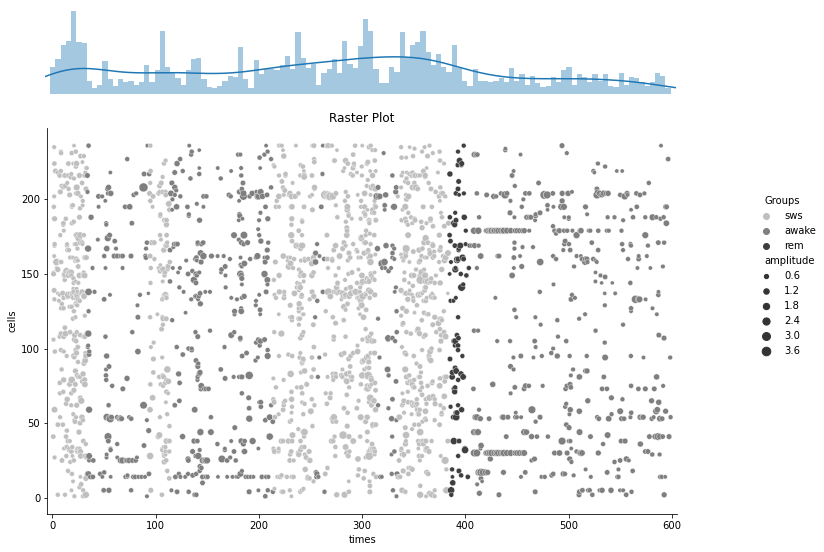

In [11]:
raster_plot(data_set=full_dataset[:,:,0], hypno_=Hypno_[:,0],
            sr=30.955, dot_size=(15,80), type=1, palette_='gist_yarg',
            bins_=np.linspace(0,600,120), xlim_=[-5,605], kde_= True, save_address=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
c:\users\admin\anaconda3\envs\pytorch\lib\site

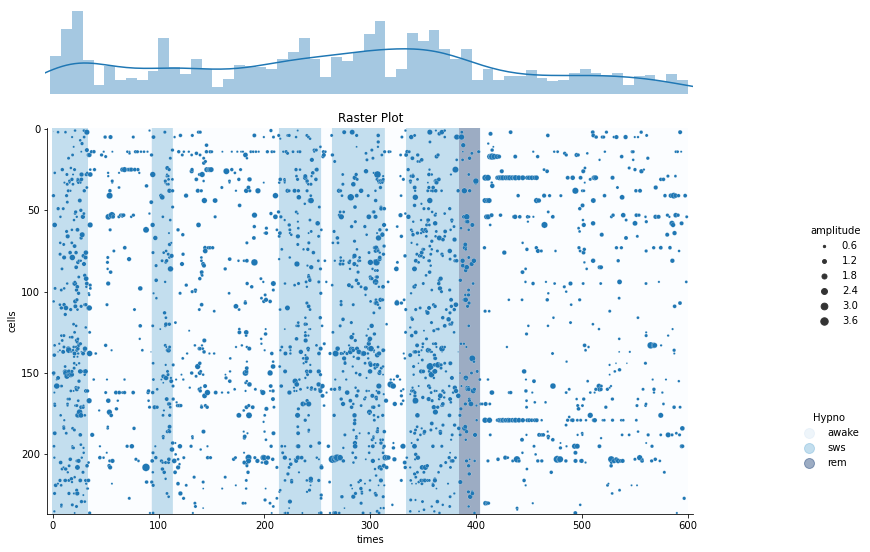

In [15]:
raster_plot(data_set=full_dataset[:,:,0], hypno_=Hypno_[:,0],
            sr=30.955, dot_size=(15,80), type=2, palette_='rocket_r',
            bins_=np.linspace(0,600,60), xlim_=[-5,605], kde_= True, save_address=False)

### Average firing rate and amplitude per cell for each individual unit

In [39]:
# initializing activation class

activation_ = activation(hypno=Hypno_, data=full_dataset, hypno_artifacts=np.empty(1), data_artifacts=np.empty(1))

# executing mean firing rate calculation
activation_.mean_fire(file_nr=0, sr=30.955, amplitude_NaN_Zero=False)


# getting mean firing rate result for all cells in given file
sws_fr, rem_fr, awake_fr = activation_.get_mean_firing_rates()

# getting mean amplitude for all cells in given file
sws_amp, rem_amp, awake_amp = activation_.get_mean_amplitudes()


# getting data in sws, rem, awake (data is cleaned for artifacts if the artifact signal is given)
sws, rem, awake = activation_.get_group_data()


output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
SWS size (18573, 237), REM size (18573, 237), awake size (18573, 237)


I:\Marco\analysis_nima\Python Scripts\ETL.py:159: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_sws = np.sum(np.where(data_sws > 0, data_sws, 0), axis = 0) / np.sum(np.where(data_sws > 0, 1, 0), axis = 0)
I:\Marco\analysis_nima\Python Scripts\ETL.py:160: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_rem = np.sum(np.where(data_rem > 0, data_rem, 0), axis = 0) / np.sum(np.where(data_rem > 0, 1, 0), axis = 0)
I:\Marco\analysis_nima\Python Scripts\ETL.py:161: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_awake = np.sum(np.where(data_awake > 0, data_awake, 0), axis = 0) / np.sum(np.where(data_awake > 0, 1, 0), axis = 0)


### Running in the loop for many files

In [2]:
# initializing ETL
ETL_ = ETL(sf=30.955, ending='.mat', unit_length=600)

# giving file or files path
ETL_.get_path('I:/Marco/analysis_nima/250520_m18a')
#ETL_.get_path('I:/Marco/analysis_nima/290520_m17a')
# loading all files to ETL memory
ETL_.load_files()

# getting hypno signals for all files
Hypno_ = ETL_.get_hypno()

# getting full data set
full_dataset = ETL_.get_data_values()

print(f'Hypno shape {Hypno_.shape} and Data shape {full_dataset.shape}')


# setting artifact period
#ETL_.set_artifact(start_= 0, end_= 1000, file_= 0) # start and end should be based on sampling index


# getting artifacts
data_artifacts, hypno_artifacts = ETL_.get_artifacts()
print(f'data artifact shape {data_artifacts.shape}, hypno_artifact shape {hypno_artifacts.shape}')


# initializing activation class

activation_ = activation(hypno=Hypno_, data=full_dataset, hypno_artifacts=np.empty(1), data_artifacts=np.empty(1))

frequency_ = []
amplitude_ = []

for i in range(Hypno_.shape[1]):
    
    # executing mean firing rate calculation
    activation_.mean_fire(file_nr=i, sr=30.955, amplitude_NaN_Zero=False)


    # getting mean firing rate result for all cells in given file
    
    frequency_.append(activation_.get_mean_firing_rates())

    # getting mean amplitude for all cells in given file
    amplitude_.append(activation_.get_mean_amplitudes())

sws_fr = np.stack(frequency_)[:,0,:]
rem_fr = np.stack(frequency_)[:,1,:]

sws_amp = np.stack(amplitude_)[:,0,:]
rem_amp = np.stack(amplitude_)[:,1,:]

print(f'shapes: sws_fr {sws_fr.shape}, rem_fr {rem_fr.shape}, sws_amp {sws_amp.shape}, rem_amp {rem_amp.shape}')



# taking average of all recordings per mouse

sws_fr_avg_1 = np.nanmedian(sws_fr, axis=0)
rem_fr_avg_1 = np.nanmedian(rem_fr, axis=0)

sws_amp_avg_1 = np.nanmedian(sws_amp, axis=0)
rem_amp_avg_1 = np.nanmedian(rem_amp, axis=0)

print(f'shapes: sws_fr_avg {sws_fr_avg_1.shape}, rem_fr_avg {rem_fr_avg_1.shape}, sws_amp_avg {sws_amp_avg_1.shape}, rem_amp_avg {rem_amp_avg_1.shape}')

Your entered path is I:/Marco/analysis_nima/250520_m18a
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat']  Number of all files 29
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 237 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18573, 29) and Data shape (18573, 237, 29)
output = data_artifacts, hypno_artifacts
data artifact shape (18573, 237, 29), hypno_artifact shape (18573, 29)


I:\Marco\analysis_nima\Python Scripts\ETL.py:159: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_sws = np.nansum(np.where(data_sws > 0, data_sws, 0), axis = 0) / np.nansum(np.where(data_sws > 0, 1, 0), axis = 0)
I:\Marco\analysis_nima\Python Scripts\ETL.py:160: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_rem = np.nansum(np.where(data_rem > 0, data_rem, 0), axis = 0) / np.nansum(np.where(data_rem > 0, 1, 0), axis = 0)
I:\Marco\analysis_nima\Python Scripts\ETL.py:161: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_awake = np.nansum(np.where(data_awake > 0, data_awake, 0), axis = 0) / np.nansum(np.where(data_awake > 0, 1, 0), axis = 0)


output = sws, rem , awake
output = sws, rem , awake


I:\Marco\analysis_nima\Python Scripts\ETL.py:154: RuntimeWarning: invalid value encountered in true_divide
  mean_fr_rem = np.sum(np.where(data_rem > 0 , 1, 0), axis = 0) / ((np.sum(np.where(hypno == -3 , 1, 0)) - artifacts_length_rem) / sr)


output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws

I:\Marco\analysis_nima\Python Scripts\ETL.py:153: RuntimeWarning: invalid value encountered in true_divide
  mean_fr_sws = np.sum(np.where(data_sws > 0 , 1, 0), axis = 0) / ((np.sum(np.where(hypno == -2 , 1, 0)) - artifacts_length_sws) / sr)


output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
shapes: sws_fr (29, 237), rem_fr (29, 237), sws_amp (29, 237), rem_amp (29, 237)
shapes: sws_fr_avg (237,), rem_fr_avg (237,), sws_amp_avg (237,), rem_amp_avg (237,)


c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [ ]:
# taking average of all recordings per mouse

sws_fr_avg = np.nanmedian(sws_fr, axis=0)
rem_fr_avg = np.nanmedian(rem_fr, axis=0)

sws_amp_avg = np.nanmedian(sws_amp, axis=0)
rem_amp_avg = np.nanmedian(rem_amp, axis=0)

print(f'shapes: sws_fr_avg {sws_fr_avg.shape}, rem_fr_avg {rem_fr_avg.shape}, sws_amp_avg {sws_amp_avg.shape}, rem_amp_avg {rem_amp_avg.shape}')

### Run in once per mouse

In [17]:
full_fr_m1, full_amp_m1, sws_fr_m1, rem_fr_m1, awake_fr_m1, sws_amp_m1, rem_amp_m1, awake_amp_m1 =  run_per_mouse(sf_=30.955, 
                                                                                                     ending_='.mat', 
                                                                                                     unit_lenght_=600, 
                                                                                                     address_= 'I:/Marco/analysis_nima/250520_m18a',
                                                                                                     set_artifacts_=[[0,1000,0]], type_='median', 
                                                                                                     amplitude_NaN_Zero=False)

Your entered path is I:/Marco/analysis_nima/250520_m18a
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat']  Number of all files 29
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 237 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18573, 29) and Data shape (18573, 237, 29)
Artifact indices will be applied on Location, Amplitude and Hypno files 

(18573, 237, 29)
setting artifacts for file 0
output = data_artifacts, hypno_artifacts
data artifact shape (18573, 237, 29), hypn

I:\Marco\analysis_nima\Python Scripts\ETL.py:159: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_sws = np.sum(np.where(data_sws > 0, data_sws, 0), axis = 0) / np.sum(np.where(data_sws > 0, 1, 0), axis = 0)
I:\Marco\analysis_nima\Python Scripts\ETL.py:160: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_rem = np.sum(np.where(data_rem > 0, data_rem, 0), axis = 0) / np.sum(np.where(data_rem > 0, 1, 0), axis = 0)
I:\Marco\analysis_nima\Python Scripts\ETL.py:161: RuntimeWarning: invalid value encountered in true_divide
  mean_amp_awake = np.sum(np.where(data_awake > 0, data_awake, 0), axis = 0) / np.sum(np.where(data_awake > 0, 1, 0), axis = 0)


output = sws, rem , awake
output = sws, rem , awake


I:\Marco\analysis_nima\Python Scripts\ETL.py:154: RuntimeWarning: invalid value encountered in true_divide
  mean_fr_rem = np.sum(np.where(data_rem > 0 , 1, 0), axis = 0) / ((np.sum(np.where(hypno == -3 , 1, 0)) - artifacts_length_rem) / sr)


output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws

I:\Marco\analysis_nima\Python Scripts\ETL.py:153: RuntimeWarning: invalid value encountered in true_divide
  mean_fr_sws = np.sum(np.where(data_sws > 0 , 1, 0), axis = 0) / ((np.sum(np.where(hypno == -2 , 1, 0)) - artifacts_length_sws) / sr)


output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
shapes: sws_fr (29, 237), rem_fr (29, 237), sws_amp (29, 237), rem_amp (29, 237)
shapes: sws_fr_avg (237,), rem_fr_avg (237,), awake_fr_avg (237,), sws_amp_avg (237,), rem_amp_avg (237,), awake_amp_avg (237,)


c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [68]:
full_fr_m2, full_amp_m2, sws_fr_m2, rem_fr_m2, awake_fr_m2, sws_amp_m2, rem_amp_m2, awake_amp_m2 =  run_per_mouse(sf_=30.955, 
                                                                                                     ending_='.mat', 
                                                                                                     unit_lenght_=600, 
                                                                                                     address_= 'I:/Marco/analysis_nima/290520_m17a',
                                                                                                     set_artifacts_=None, type_='median',
                                                                                                     amplitude_NaN_Zero=False)

Your entered path is I:/Marco/analysis_nima/290520_m17a
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat']  Number of all files 28
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 231 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18573, 28) and Data shape (18573, 231, 28)
output = data_artifacts, hypno_artifacts
data artifact shape (18573, 231, 28), hypno_artifact shape (18573, 28)
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
o

In [69]:
full_fr_m3, full_amp_m3, sws_fr_m3, rem_fr_m3, awake_fr_m3, sws_amp_m3, rem_amp_m3, awake_amp_m3 =  run_per_mouse(sf_=30.955, 
                                                                                                     ending_='.mat', 
                                                                                                     unit_lenght_=600, 
                                                                                                     address_= 'I:/Marco/analysis_nima/110620_m18b',
                                                                                                     set_artifacts_=None, type_='median',
                                                                                                     amplitude_NaN_Zero=False)

Your entered path is I:/Marco/analysis_nima/110620_m18b
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat']  Number of all files 22
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18573 samples, number of cells are 218 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
Hypno shape (18573, 22) and Data shape (18573, 218, 22)
output = data_artifacts, hypno_artifacts
data artifact shape (18573, 218, 22), hypno_artifact shape (18573, 22)
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output = sws, rem , awake
output 

### concatinate results

In [70]:
sws_fr_avg = np.hstack([sws_fr_m1,sws_fr_m2, sws_fr_m3])
rem_fr_avg = np.hstack([rem_fr_m1,rem_fr_m2, rem_fr_m3])
awake_fr_avg = np.hstack([awake_fr_m1,awake_fr_m2, awake_fr_m3])

sws_amp_avg = np.hstack([sws_amp_m1,sws_amp_m2, sws_amp_m3])
rem_amp_avg = np.hstack([rem_amp_m1,rem_amp_m2, rem_amp_m3])
awake_amp_avg = np.hstack([awake_amp_m1,awake_amp_m2, awake_amp_m3])

### Plotting results

length of data in mouse1 237, mouse2 231, mouse3 218


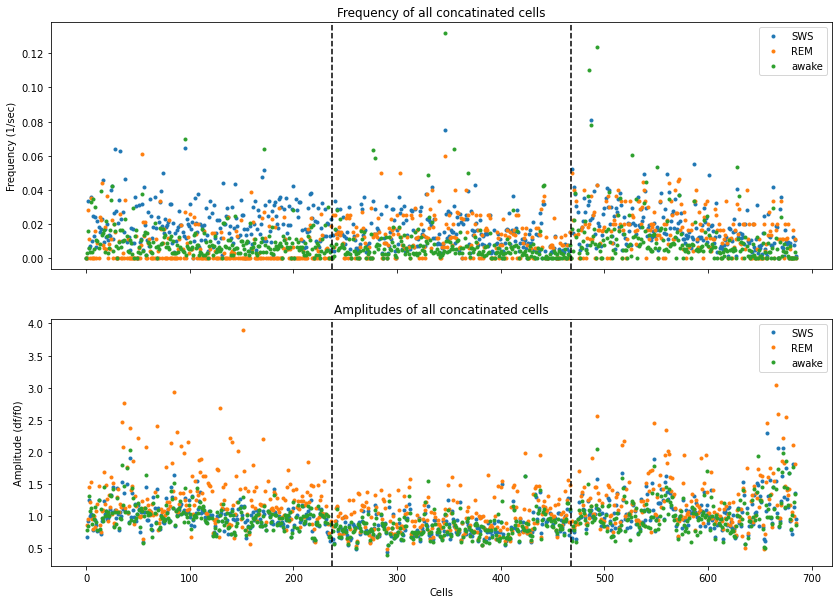

In [71]:
# plotting traces
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,10), sharex=True)
print(f'length of data in mouse1 {len(sws_fr_m1)}, mouse2 {len(sws_fr_m2)}, mouse3 {len(sws_fr_m3)}')

ax[0].plot(sws_fr_avg,'.', label = 'SWS')
ax[0].plot(rem_fr_avg,'.', label = 'REM')
ax[0].plot(awake_fr_avg,'.', label = 'awake')
ax[0].set_title('Frequency of all concatinated cells')
ax[0].set_ylabel('Frequency (1/sec)')
ax[0].legend()

ax[0].axvline(x=len(sws_fr_m1) , ls = '--', color = 'k')
ax[0].axvline(x=len(sws_fr_m2) + len(sws_fr_m1) , ls = '--', color = 'k')
#ax[0].axvline(x=len(sws_fr_m3) + len(sws_fr_m2) + len(sws_fr_m1))



ax[1].plot(sws_amp_avg,'.', label = 'SWS')
ax[1].plot(rem_amp_avg,'.', label = 'REM')
ax[1].plot(awake_amp_avg,'.', label = 'awake')
ax[1].set_title('Amplitudes of all concatinated cells')
ax[1].set_ylabel('Amplitude (df/f0)')
ax[1].set_xlabel('Cells')
ax[1].legend()

ax[1].axvline(x=len(sws_amp_m1), ls = '--', color = 'k')
ax[1].axvline(x=len(sws_amp_m2) + len(sws_amp_m1) , ls = '--', color = 'k')
#ax[1].axvline(x=len(sws_amp_m3) + len(sws_amp_m2) + len(sws_amp_m1))

c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

<Figure size 720x720 with 0 Axes>

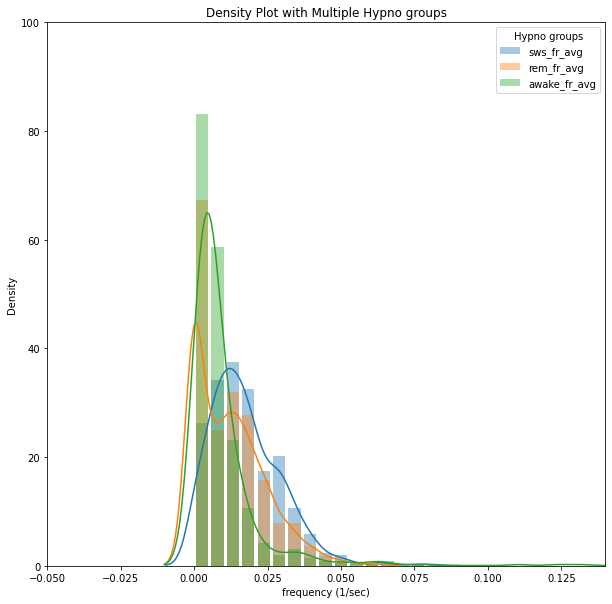

In [31]:
plot_ = Plot(x=sws_fr_avg,y=rem_fr_avg, z = awake_fr_avg, 
             xlabel='sws_fr_avg', ylabel='rem_fr_avg', zlabel = 'awake_fr_avg',
            save_address=False)
plot_.marginal_dist(awake_=True, bins_=np.linspace(0,.1,20), 
                    range_=[[-.05, .14], [-.05, 100]], density_=True, 
                    kde_=True, name_='frequency (1/sec)')

c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

<Figure size 720x720 with 0 Axes>

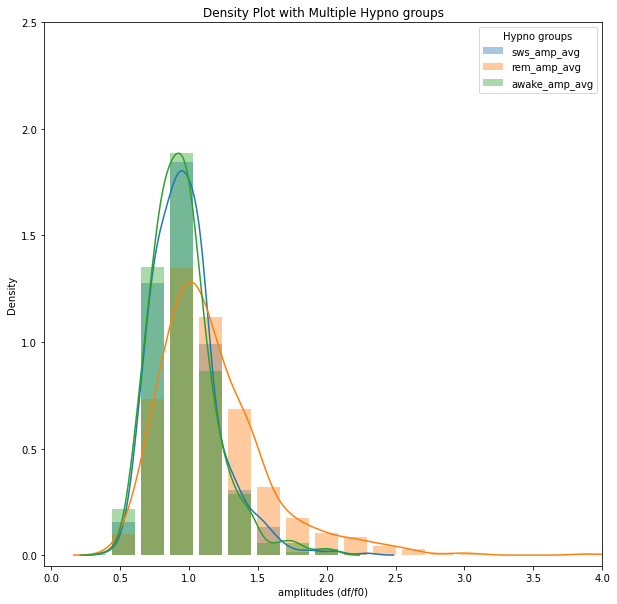

In [32]:
plot_ = Plot(x=sws_amp_avg,y=rem_amp_avg, z = awake_amp_avg, 
             xlabel='sws_amp_avg', ylabel='rem_amp_avg', zlabel = 'awake_amp_avg',
            save_address=False)
plot_.marginal_dist(awake_=True, bins_=np.linspace(0,4,20), 
                    range_=[[-.05, 4], [-.05, 2.5]], density_=True, 
                    kde_=True, name_='amplitudes (df/f0)')

'kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }'

<Figure size 720x720 with 0 Axes>

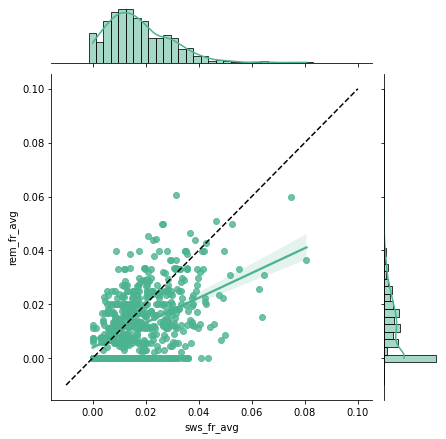

In [37]:
plot_ = Plot(x=sws_fr_avg,y=rem_fr_avg, z = awake_fr_avg, 
             xlabel='sws_fr_avg', ylabel='rem_fr_avg', zlabel = 'awake_fr_avg',
            save_address=False)
plot_.join_plot(bins_= np.linspace(-.01, .1, 40), kind_='reg')

'kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }'

<Figure size 720x720 with 0 Axes>

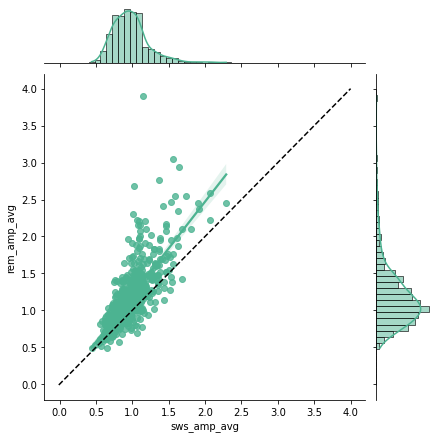

In [105]:
plot_ = Plot(x=sws_amp_avg,y=rem_amp_avg, z = awake_amp_avg, 
             xlabel='sws_amp_avg', ylabel='rem_amp_avg', zlabel = 'awake_amp_avg',
            save_address=False)
plot_.join_plot(bins_= np.linspace(-.01, 4, 50), kind_ = 'reg')

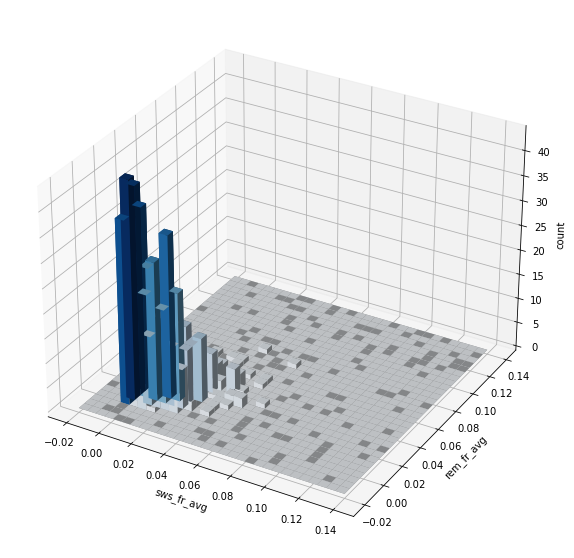

In [21]:
plot_ = Plot(x=sws_fr_avg, y=rem_fr_avg, 
             z= awake_fr_avg, xlabel='sws_fr_avg', ylabel='rem_fr_avg', zlabel = 'awake_fr_avg',
            save_address=False)
plot_.hist_3d(bins_=30, range_=[[-.02, .14], [-.02, .14]], density_=False)


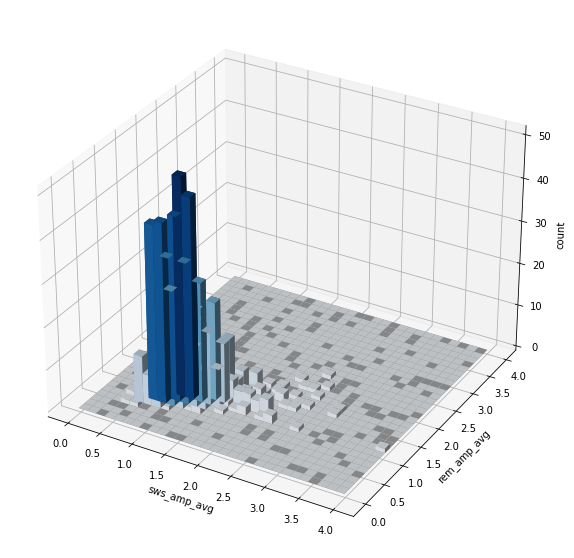

In [18]:
plot_ = Plot(x=sws_amp_avg,y=rem_amp_avg, z = awake_amp_avg, 
             xlabel='sws_amp_avg', ylabel='rem_amp_avg', zlabel = 'awake_amp_avg',
            save_address=False)
plot_.hist_3d(bins_=30, range_=[[-.02, 4], [-.02, 4]], density_=False)

In [23]:
#plot_.surface_3d(bins_=30, range_=[[-.02, .12], [-.02, .12]], density_=True)

In [24]:
#plot_.hist_2d(bins_=5, range_=[[-.01, .1], [-.01, .1]], interpolation_=False)


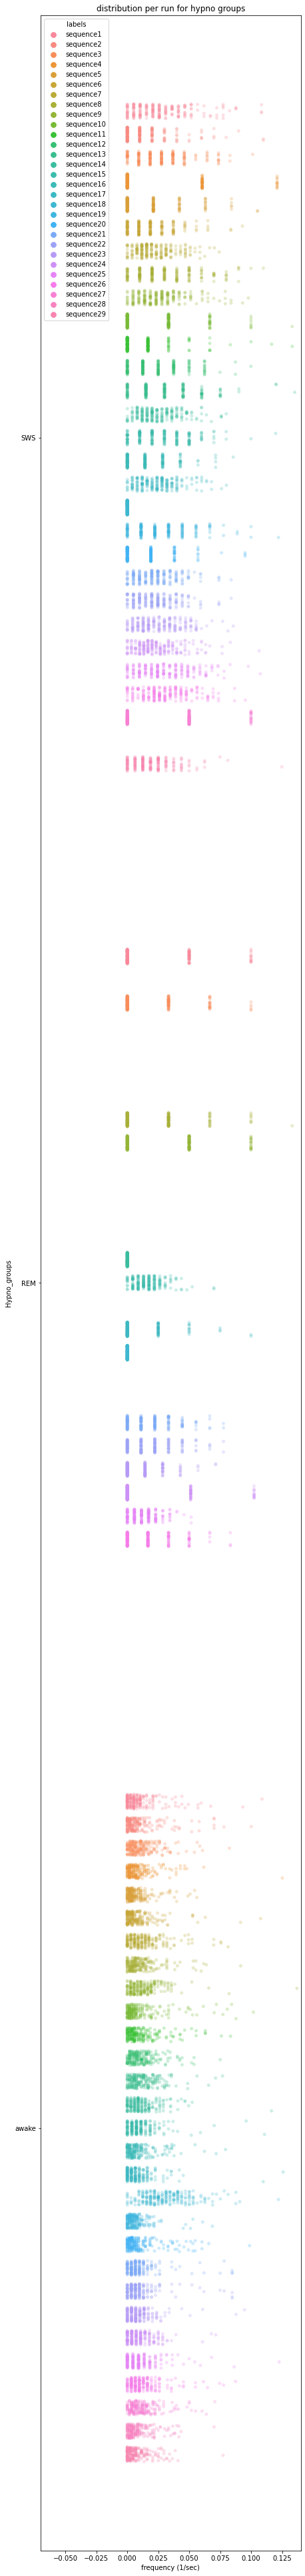

In [40]:
plot_.variation_plot(data_=full_fr_m1, figure_size=(7,70), 
                     x_label_='frequency (1/sec)', range_ = [-.07, .14], jitter_ = 0.25)


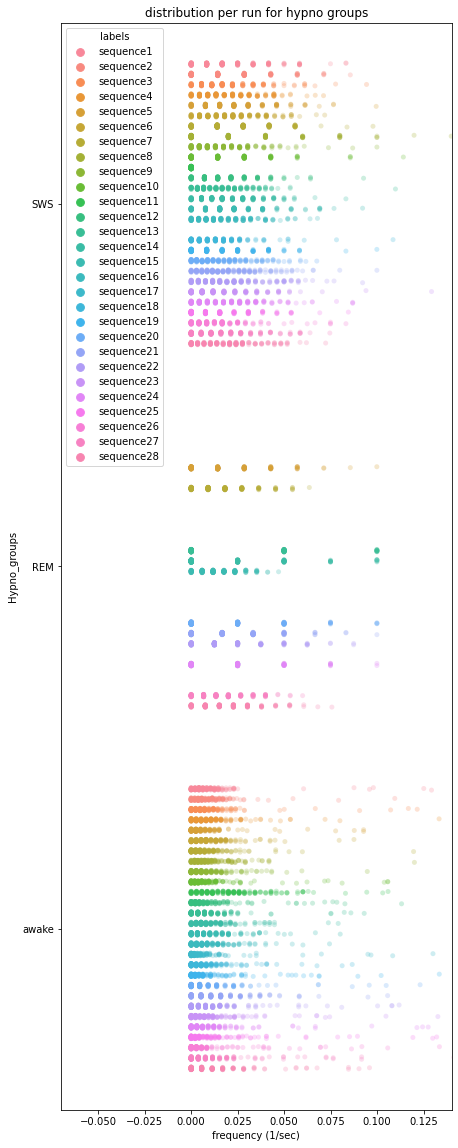

In [29]:
plot_.variation_plot(data_=full_fr_m2, figure_size=(7,20), 
                     x_label_='frequency (1/sec)', range_ = [-.07, .14])


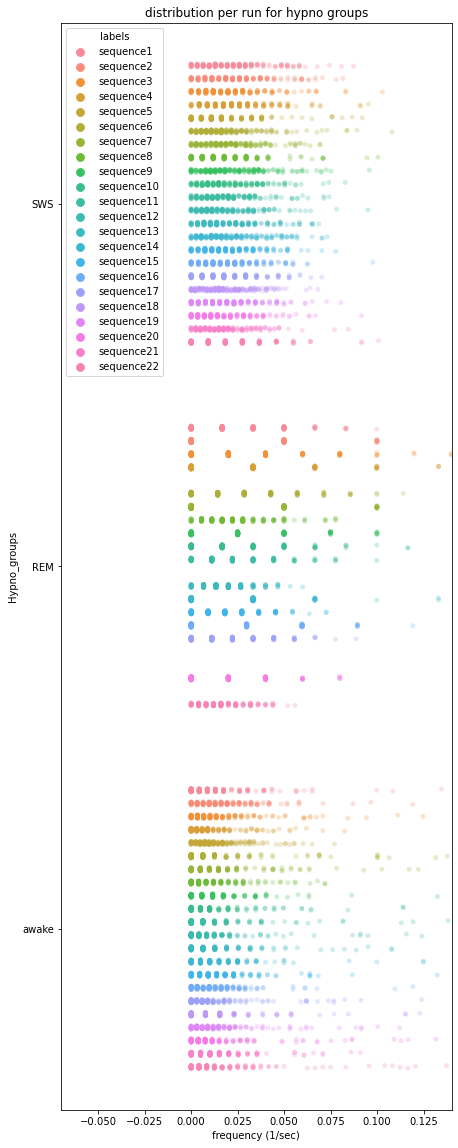

In [30]:
plot_.variation_plot(data_=full_fr_m3, figure_size=(7,20), 
                     x_label_='frequency (1/sec)', range_ = [-.07, .14])


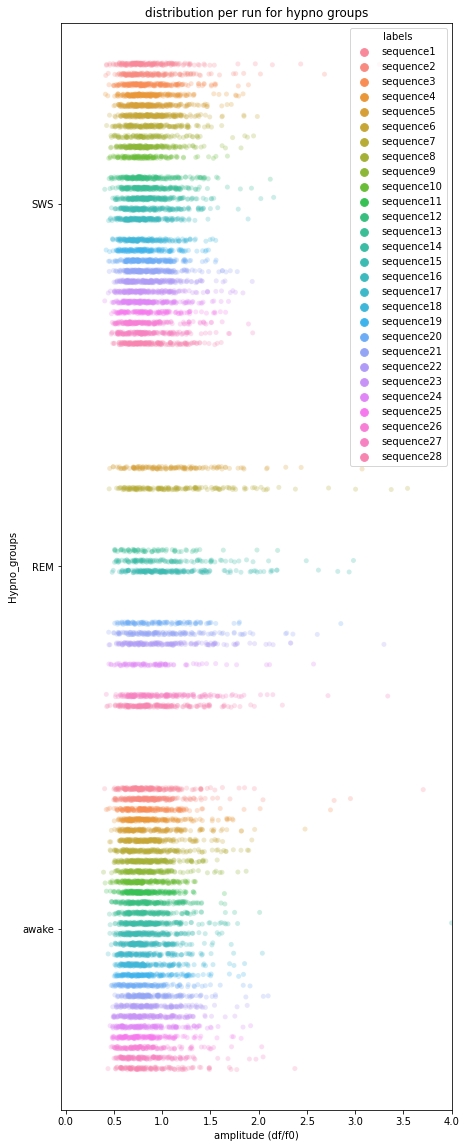

In [9]:
plot_.variation_plot(data_=full_amp_m1, figure_size=(7,20), 
                     x_label_='amplitude (df/f0)', range_ = [-.05, 4])

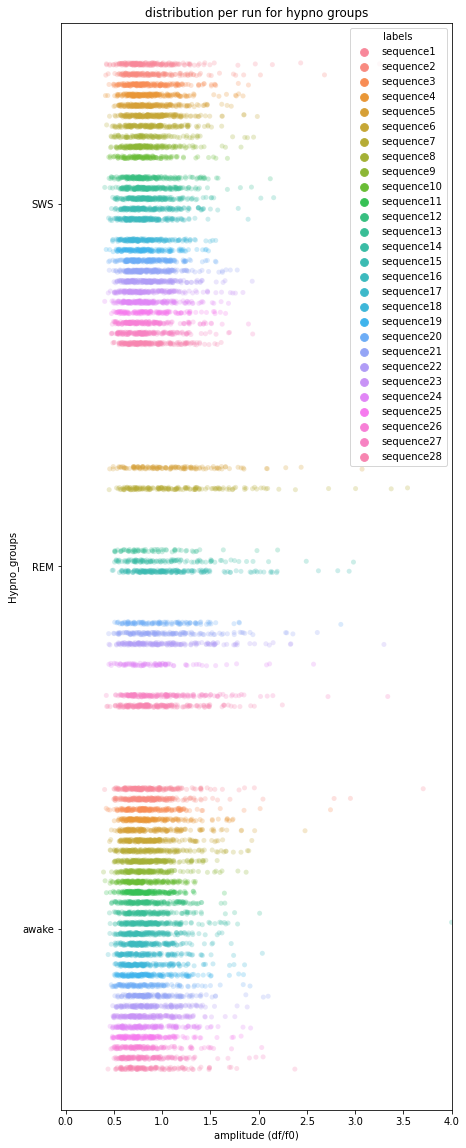

In [26]:
plot_.variation_plot(data_=full_amp_m2, figure_size=(7,20), 
                     x_label_='amplitude (df/f0)', range_ = [-.05, 4], jitter = 0.05)

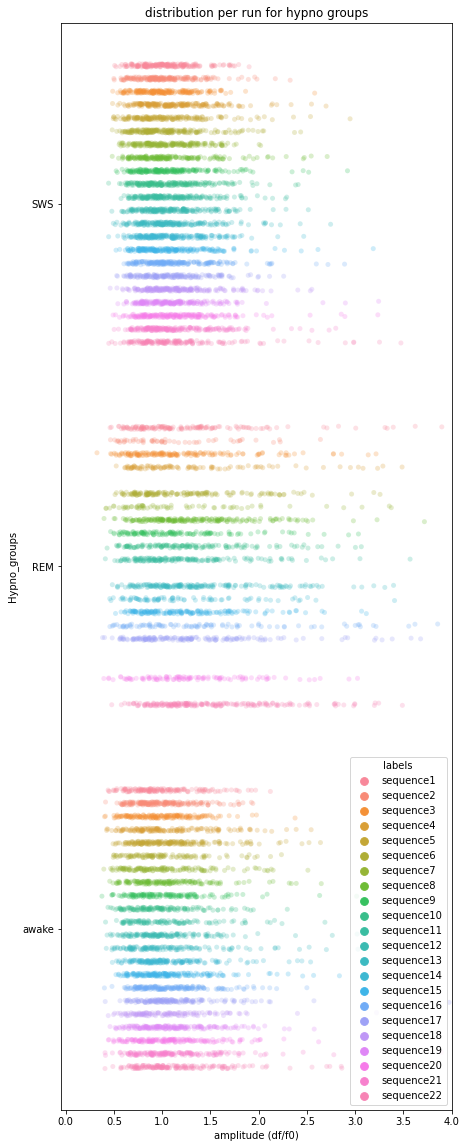

In [27]:
plot_.variation_plot(data_=full_amp_m3, figure_size=(7,20), 
                     x_label_='amplitude (df/f0)', range_ = [-.05, 4])